# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
import math
from scipy import optimize

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

## Question 1

We start out by setting up the consumer mazimization problem. This is done by setting up a function returning the utility function and the objective function. We then call upon a solver that can solve the maximization problem given the parameters. 

In [2]:
# setting up function
# we use that c*=x to simplify
def u_func(l, w, epsilon, m=1, nu=10, tau0=0.4, tau1=0.1, kappa=0.4):
    return math.log10( m+w*l-(tau0*w*l+tau1*max(w*l-kappa,0)) ) - nu*l**(1+1/epsilon)/(1+1/epsilon)

epsilon = 0.3
w = 1 # arbitrary value for w, so problem can be solved

# objective funciton (to minimize)
def value_of_choice(l,w,epsilon):
    return -u_func(l,w,epsilon)

# call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(w,epsilon))

# c. unpack solution
l = sol_case1.x
u = u_func(l,w,epsilon)


## Question 2

Plot $l^{*}$and $c^{*}$ as a function of w in the range 0.5 to 1.5.


We create vectors for wage, labour and consumption, where the labour and consumptions vectors are empty. The labour and concumption is calculated for every value of w in a for loop. 
From this we are able to plot the optimal values of labour and consumption

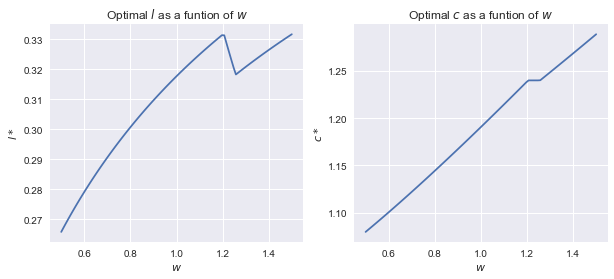

In [4]:
N = 100
# vector of wages
w_vec = np.linspace(0.5,1.5,N)
l_vec = np.empty(N)
c_vec = np.empty(N)

# function to calculate consumption
def c_func(l, w, epsilon, m=1, tau0=0.4, tau1=0.1, kappa=0.4):
    return m+w*l-(tau0*w*l+tau1*max(w*l-kappa,0)) 

# calculates l and c for every value of w
for i,w in enumerate(w_vec):
    w = w_vec[i]
    sol_case1 = optimize.minimize_scalar(value_of_choice,method='bounded',bounds=(0,1),args=(w,epsilon))
    l_vec[i] = sol_case1.x
    l=l_vec[i]
    c_vec[i] = c_func(l,w,epsilon)

# creates the figures
import matplotlib.pyplot as plt
plt.style.use("seaborn")

fig = plt.figure(figsize=(10,4))

fig_w_l = fig.add_subplot(1,2,1)
fig_w_l.plot(w_vec,l_vec)

fig_w_l.set_title('Optimal $l$ as a funtion of $w$')
fig_w_l.set_xlabel('$w$')
fig_w_l.set_ylabel('$l*$')
fig_w_l.grid(True)

fig_w_c = fig.add_subplot(1,2,2)
fig_w_c.plot(w_vec,c_vec)

fig_w_c.set_title('Optimal $c$ as a funtion of $w$')
fig_w_c.set_xlabel('$w$')
fig_w_c.set_ylabel('$c*$')
fig_w_c.grid(True)

## Question 3

Condsider a population with $N=10.000$ individuals indexed by i.
Assume the distribution of wages is uniform such that: 


\begin{equation}
w_{i}=\bigcup(0.5,1.5)
\end{equation}

Denote the optimal choices of individual i by $l_{i}^{*}$and $c_{i}^{*}.$

Calculate the total tax revenue given by:

\begin{equation}
T=\sum_{i=1}^{N}\left[\tau_{0}w_{i}l_{i}^{*}+\tau_{1}max\{wl-\kappa,0\}]\right]
\end{equation}

We set seed to be able to draw the same uniform numbers everytime we run the code. This time we compute the vector of wages by uniformly drawn numbers in the range 0.5 to 1.5 for N2 entries. 

Then we compute two functions. The first function is a function calculating the taxes paid by each individual while the second function returns the total tax revenue.

In [7]:
#  Alt med firkant foran kan i princippet slettes. Det ligger i .py filen.

# np.random.seed(42)
# N2 = 10000
# w_vec2 = np.random.uniform(0.5,1.5,N2)
# l_vec2 = np.empty(N2)
# t_vec = np.empty(N2)

# # function for calculating taxes paid by each individual
# def t_func(l, w, epsilon, m=1, tau0=0.4, tau1=0.1, kappa=0.4):
#     return tau0*w*l+tau1*max(w*l-kappa,0)

# # returns total tax revenue
# def tax_rev():
#     for i,w in enumerate(w_vec2):
#         w = w_vec2[i]
#         sol_case1 = optimize.minimize_scalar(value_of_choice,method='bounded',bounds=(0,1),args=(w, epsilon))
#         l_vec2[i] = sol_case1.x
#         l=l_vec2[i]
#         t_vec[i] = inauguralproject.t_func(l,w,epsilon)
#     return sum(t_vec)


print(f'The total tax revnue is given by {inauguralproject.tax_rev(epsilon=0.3):.2f} ')


The total tax revnue is given by 1262.34 


## Question 4

What would the tax revenue be instead of $\varepsilon=0.1$

In [8]:
print(f'Given the new value of epsilon the tax revenue becomes {inauguralproject.tax_rev(epsilon=0.1):.2f} ')

Given the new value of epsilon the tax revenue becomes 2900.18 


## Question 5

Consider a politician who wishes to maximize the tax revenue.


Which $\tau_{0},\,\tau_{1}$ and $\kappa$ would you suggest her to
implement? Report the tax revenue you expect to obtain. 

Fra Emil: Question 5 is solvable using a multi-dimensional optimizer over t0,t1 and kappa where the objective function has another optimizing problem in it choosing the individual optimal labor supply. That is, when the policy maker tries different tax values (the outer optimizer), the workers will take the new tax rates into account and change their labor supply (the inner optimizer).

# Conclusion